In [1]:
import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir) 
from model.image_utils import *
sys.path.append('../model')
import image_utils

In [2]:
def get_svhn():
    
    svhn_train = loadmat('../../Datasets/train_32X32.mat') # SVHN train set
    svhn_trainx = svhn_train['X'] # train images
    svhn_trainy = svhn_train['y'] # train labels. We don't need them though.
    
    svhn = []
    
    for img in svhn_trainx.T:
        svhn.append(img.T)
    return svhn

In [3]:
svhn = get_svhn()

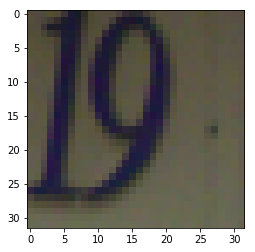

In [4]:
show_1(svhn[1])

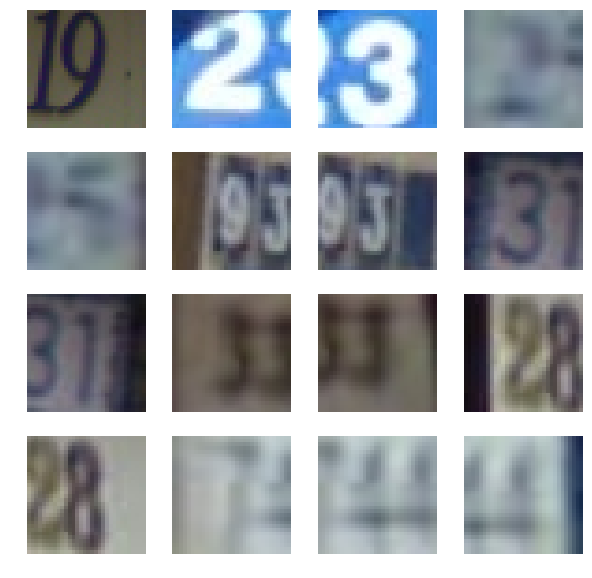

In [5]:
# Lets see our images
ImageCollector.show(None,svhn)

In [6]:
def resize_normal_svhn(svhn):
    
    imgs = []
    for img in svhn:
        resized_img = resize(img)
        if resized_img.shape == (64,64,3):
            imgs.append(resized_img)
        else:
            print('Image reshaped incorrectly')
            pass

    return np.asarray(imgs)

In [7]:
images = resize_normal_svhn(svhn)

In [8]:
## Add noise
images_wnoise = add_noise(images, 1, 5)

In [14]:
# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2
#train the model - generator and discriminator 
from model.dcgan import DCGAN

tf.reset_default_graph()
dcgan = DCGAN(batch_size=64,
              z_dim=100,
              model_name='DCGAN',
              data_source='CelebA',
              z_dist='norm')
dcgan.train(images_wnoise, learning_rate=0.0001, iters=1500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 73257
new size 73257
Step: 0, D_loss: 1.4867229461669922, G_loss: 0.4199484586715698
../CelebA/results/0.jpg
Step: 100, D_loss: 1.3250551223754883, G_loss: 1.2319777011871338
../CelebA/results/100.jpg
Step: 200, D_loss: 0.6871594190597534, G_loss: 3.244816303253174
../CelebA/results/200.jpg
Step: 300, D_loss: 0.4722329378128052, G_loss: 2.6863949298858643
../CelebA/results/300.jpg
Step: 400, D_loss: 0.6076759099960327, G_loss: 4.482134819030762
../CelebA/results/400.jpg
Step: 500, D_loss: 0.73564

In [9]:
# show the graph
from model.cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('../SVHN/checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

In [10]:
tf.train.get_checkpoint_state('../SVHN/checkpoints')
checkpoint = tf.train.latest_checkpoint('../SVHN/checkpoints')

In [11]:
#Step 1 
#import the model metagraph
saver = tf.train.import_meta_graph('../SVHN/checkpoints/DCGAN.ckpt.meta', clear_devices=True)
#make that as the default graph
graph = tf.get_default_graph()
input_graph_def = graph.as_graph_def()
sess = tf.Session()
#now restore the variables
saver.restore(sess, "../SVHN/checkpoints/DCGAN.ckpt")

INFO:tensorflow:Restoring parameters from ../SVHN/checkpoints/DCGAN.ckpt


In [12]:
#Step 2
# Find the output name
graph = tf.get_default_graph()
for n in graph.as_graph_def().node: 
      print (n.name)

save/RestoreV2/shape_and_slices
save/RestoreV2/tensor_names
save/SaveV2/shape_and_slices
save/SaveV2/tensor_names
save/Const
save/RestoreV2
train_step_1/d_adam/epsilon
train_step_1/d_adam/beta2
train_step_1/d_adam/beta1
train_step_1/d_adam/learning_rate
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1
save/Assign_29
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/read
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/Initializer/zeros
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/Assign
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam
save/Assign_28
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/read
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/Initializer/zeros
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/Assign
Discriminator/fc_layer_d/d_fc_kernel_1/d_adam_1
save/Assign_26
Discriminator/fc_layer_d/d_fc_kernel_1/d_adam_1/read
Discriminator/fc_layer_d/d_fc_kernel_1/d_adam_1/Initializer/zeros/Const
Discriminator/fc_layer_d/d_fc_kernel_1/d_ada

train_step_1/gradients/AddN_13
train_step_1/gradients/Discriminator_1/d_conv_layer_1/Relu_grad/ReluGrad
train_step_1/gradients/Discriminator_1/d_conv_layer_1/add_grad/Sum_1
train_step_1/gradients/Discriminator_1/d_conv_layer_1/add_grad/Reshape_1
train_step_1/gradients/Discriminator_1/d_conv_layer_1/add_grad/Sum
train_step_1/gradients/Discriminator_1/d_conv_layer_1/add_grad/Reshape
train_step_1/gradients/Discriminator_1/d_conv_layer_1/add_grad/tuple/group_deps
train_step_1/gradients/Discriminator_1/d_conv_layer_1/add_grad/tuple/control_dependency_1
train_step_1/gradients/Discriminator_1/d_conv_layer_1/add_grad/tuple/control_dependency
train_step_1/gradients/Discriminator_1/d_conv_layer_1/Conv2D_grad/Conv2DBackpropFilter
train_step_1/gradients/Discriminator_1/d_conv_layer_1/Conv2D_grad/Conv2DBackpropInput
train_step_1/gradients/Discriminator_1/d_conv_layer_1/Conv2D_grad/tuple/group_deps
train_step_1/gradients/Discriminator_1/d_conv_layer_1/Conv2D_grad/tuple/control_dependency_1
train_ste

train_step/gradients/Generator/batch_norm/cond/Merge_grad/tuple/control_dependency_2
train_step/gradients/Generator/batch_norm/batchnorm/add_1_grad/tuple/control_dependency_2
train_step/gradients/Generator/batch_norm/batchnorm/mul_grad/Mul_1_1
train_step/gradients/Generator/batch_norm/batchnorm/mul_grad/Sum_1_1
train_step/gradients/Generator/batch_norm/batchnorm/mul_grad/Reshape_1_1
train_step/gradients/Generator/batch_norm/batchnorm/mul_grad/Mul_2
train_step/gradients/Generator/batch_norm/batchnorm/mul_grad/Sum_2
train_step/gradients/Generator/batch_norm/batchnorm/mul_grad/Reshape_2
train_step/gradients/Generator/batch_norm/batchnorm/mul_grad/tuple/group_deps_1
train_step/gradients/Generator/batch_norm/batchnorm/mul_grad/tuple/control_dependency_1_1
train_step/gradients/AddN_11_1
train_step/gradients/Generator/batch_norm/batchnorm/Rsqrt_grad/RsqrtGrad_1
train_step/gradients/Generator/batch_norm/batchnorm/add_grad/Sum_1_1
train_step/gradients/Generator/batch_norm/batchnorm/add_grad/Res

In [13]:
#Step 3
from tensorflow.python.platform import gfile
from tensorflow.python.framework import graph_util

output_node_names=[v.op.name for v in tf.global_variables()] 

output_graph_def = graph_util.convert_variables_to_constants(
        sess, # The session
        input_graph_def, # input_graph_def is useful for retrieving the nodes 
        output_node_names)    

INFO:tensorflow:Froze 72 variables.
Converted 72 variables to const ops.


In [14]:
output_node_names

['Generator/fc_layer_g/g_fc_kernel_0',
 'Generator/fc_layer_g/fc_bias/g_fc_bias_0',
 'Generator/batch_norm/Generator/batch_norm/moments/mean/ExponentialMovingAverage',
 'Generator/batch_norm/Generator/batch_norm/moments/variance/ExponentialMovingAverage',
 'Generator/g_conv_transpose_layer_1/g_conv_transpose_kernel_1',
 'Generator/g_conv_transpose_layer_1/conv_bias/g_conv_transpose_bias_1',
 'Generator/batch_norm/Generator/batch_norm_1/moments/mean/ExponentialMovingAverage',
 'Generator/batch_norm/Generator/batch_norm_1/moments/variance/ExponentialMovingAverage',
 'Generator/g_conv_transpose_layer_2/g_conv_transpose_kernel_2',
 'Generator/g_conv_transpose_layer_2/conv_bias/g_conv_transpose_bias_2',
 'Generator/batch_norm/Generator/batch_norm_2/moments/mean/ExponentialMovingAverage',
 'Generator/batch_norm/Generator/batch_norm_2/moments/variance/ExponentialMovingAverage',
 'Generator/g_conv_transpose_layer_3/g_conv_transpose_kernel_3',
 'Generator/g_conv_transpose_layer_3/conv_bias/g_co

In [15]:
#Step 4
#output folder
output_fld ='./'
#output pb file name
output_model_file = 'model.pb'
from tensorflow.python.framework import graph_io
#write the graph
graph_io.write_graph(output_graph_def, output_fld, output_model_file, as_text=False)

'./model.pb'

In [16]:
graph, graph_def = loadpb('./model.pb',model_name='DCGAN')

NameError: name 'loadpb' is not defined

In [ ]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('../SVHN/checkpoints/DCGAN.ckpt.meta')
    loader.restore(sess, '../SVHN/checkpoints/DCGAN.ckpt')
    graph2 = tf.get_default_graph()
    for op in graph2.get_operations():
        print(op.name)
    #input_= graph.get_tensor_by_name('Placeholder:0')

In [ ]:
graph2.get_tensor_by_name('inputs/z:0')